In [67]:
%load_ext autoreload
%autoreload 2

import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from src.loader import load_csv
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = load_csv("../data/raw/gapminder_full.csv")
df.head()

[INFO] loaded 1704 rows and 6 columns
[INFO] Columns: Index(['country', 'year', 'population', 'continent', 'life_exp', 'gdp_cap'], dtype='object')


,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


In [4]:
print(df.describe())

             year    population     life_exp        gdp_cap
count  1704.00000  1.704000e+03  1704.000000    1704.000000
mean   1979.50000  2.960121e+07    59.474439    7215.327081
std      17.26533  1.061579e+08    12.917107    9857.454543
min    1952.00000  6.001100e+04    23.599000     241.165876
25%    1965.75000  2.793664e+06    48.198000    1202.060309
50%    1979.50000  7.023596e+06    60.712500    3531.846988
75%    1993.25000  1.958522e+07    70.845500    9325.462346
max    2007.00000  1.318683e+09    82.603000  113523.132900


In [5]:
print(df.isnull().sum())

country       0
year          0
population    0
continent     0
life_exp      0
gdp_cap       0
dtype: int64


In [6]:
print(df.dtypes)

country        object
year            int64
population      int64
continent      object
life_exp      float64
gdp_cap       float64
dtype: object


In [7]:
from src.cleaning import convert_column_to_datetime, standardize_text_column

df = convert_column_to_datetime(df, 'year', '%Y')
print(df.head())

[INFO] Converted column 'year' to datetime with format '%Y'.
       country       year  population continent  life_exp     gdp_cap
0  Afghanistan 1952-01-01     8425333      Asia    28.801  779.445314
1  Afghanistan 1957-01-01     9240934      Asia    30.332  820.853030
2  Afghanistan 1962-01-01    10267083      Asia    31.997  853.100710
3  Afghanistan 1967-01-01    11537966      Asia    34.020  836.197138
4  Afghanistan 1972-01-01    13079460      Asia    36.088  739.981106


In [29]:
life_exp_describtion = df['life_exp'].describe()
gdp_cap_describtion = df['gdp_cap'].describe()

In [30]:
df['gdp_total'] = df['gdp_cap'] * df['population']
df['life_exp_bin'] = pd.cut(df["life_exp"], bins= [life_exp_describtion["min"], life_exp_describtion["25%"], life_exp_describtion["50%"], life_exp_describtion["75%"], life_exp_describtion["max"]], labels=["Low", "Medium", "High", "Very High"])
df['gdp_cap_bin'] = pd.cut(df["gdp_cap"], bins= [gdp_cap_describtion["min"], gdp_cap_describtion["25%"], gdp_cap_describtion["50%"], gdp_cap_describtion["75%"], gdp_cap_describtion["max"]], labels=["Low", "Medium", "High", "Very High"])
print(df.head())

       country       year  population continent  life_exp     gdp_cap  \
0  Afghanistan 1952-01-01     8425333      Asia    28.801  779.445314   
1  Afghanistan 1957-01-01     9240934      Asia    30.332  820.853030   
2  Afghanistan 1962-01-01    10267083      Asia    31.997  853.100710   
3  Afghanistan 1967-01-01    11537966      Asia    34.020  836.197138   
4  Afghanistan 1972-01-01    13079460      Asia    36.088  739.981106   

      gdp_total life_exp_bin gdp_cap_bin  
0  6.567086e+09          Low         Low  
1  7.585449e+09          Low         Low  
2  8.758856e+09          Low         Low  
3  9.648014e+09          Low         Low  
4  9.678553e+09          Low         Low  


In [31]:
df = standardize_text_column(df, ["country", "continent"], False)

[INFO] Standardized text in column 'country'.
[INFO] Standardized text in column 'continent'.


In [32]:
print(df.head())

       country       year  population continent  life_exp     gdp_cap  \
0  Afghanistan 1952-01-01     8425333      Asia    28.801  779.445314   
1  Afghanistan 1957-01-01     9240934      Asia    30.332  820.853030   
2  Afghanistan 1962-01-01    10267083      Asia    31.997  853.100710   
3  Afghanistan 1967-01-01    11537966      Asia    34.020  836.197138   
4  Afghanistan 1972-01-01    13079460      Asia    36.088  739.981106   

      gdp_total life_exp_bin gdp_cap_bin  
0  6.567086e+09          Low         Low  
1  7.585449e+09          Low         Low  
2  8.758856e+09          Low         Low  
3  9.648014e+09          Low         Low  
4  9.678553e+09          Low         Low  


In [33]:
df_summery = df.groupby('continent').agg({
    'life_exp' : ['mean', 'median', 'std'],
    'gdp_cap' : ['mean', 'median', 'std'],
    'population' : ['mean', 'median', 'std']
})

print(df_summery)



            life_exp                           gdp_cap                \
                mean   median        std          mean        median   
continent                                                              
Africa     48.865330  47.7920   9.150210   2193.754578   1192.138217   
Americas   64.658737  67.0480   9.345088   7136.110356   5465.509853   
Asia       60.064903  61.7915  11.864532   7902.150428   2646.786844   
Europe     71.903686  72.2410   5.433178  14469.475533  12081.749115   
Oceania    74.326208  73.6650   3.795611  18621.609223  17983.303955   

                           population                            
                    std          mean      median           std  
continent                                                        
Africa      2827.929863  9.916003e+06   4579311.0  1.549092e+07  
Americas    6396.764112  2.450479e+07   6227510.0  5.097943e+07  
Asia       14045.373112  7.703872e+07  14530830.5  2.068852e+08  
Europe      9355.213498  1.

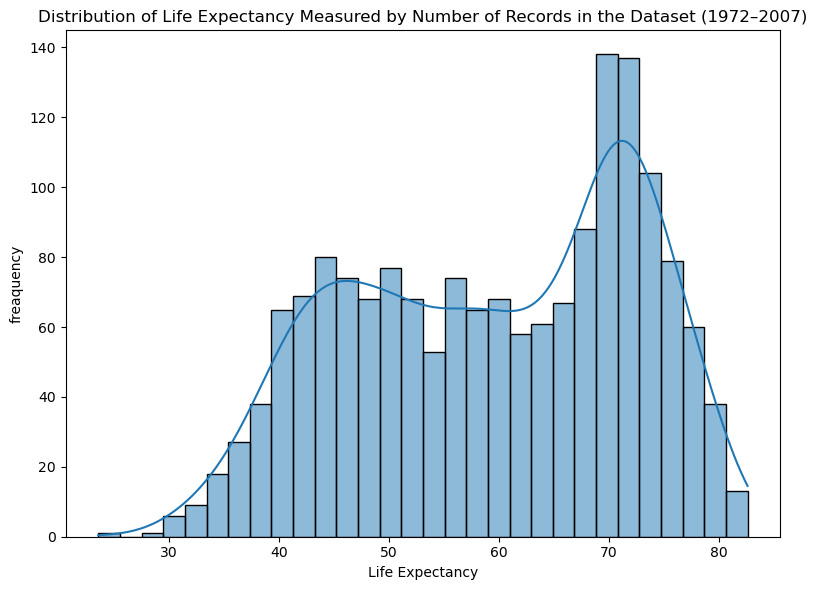

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='life_exp', bins=30,kde= True)
plt.title('Distribution of Life Expectancy Measured by Number of Records in the Dataset (1972–2007)')
plt.xlabel('Life Expectancy')
plt.ylabel('freaquency')
plt.tight_layout()
plt.show()

In [35]:
print(df)

          country       year  population continent  life_exp     gdp_cap  \
0     Afghanistan 1952-01-01     8425333      Asia    28.801  779.445314   
1     Afghanistan 1957-01-01     9240934      Asia    30.332  820.853030   
2     Afghanistan 1962-01-01    10267083      Asia    31.997  853.100710   
3     Afghanistan 1967-01-01    11537966      Asia    34.020  836.197138   
4     Afghanistan 1972-01-01    13079460      Asia    36.088  739.981106   
...           ...        ...         ...       ...       ...         ...   
1699     Zimbabwe 1987-01-01     9216418    Africa    62.351  706.157306   
1700     Zimbabwe 1992-01-01    10704340    Africa    60.377  693.420786   
1701     Zimbabwe 1997-01-01    11404948    Africa    46.809  792.449960   
1702     Zimbabwe 2002-01-01    11926563    Africa    39.989  672.038623   
1703     Zimbabwe 2007-01-01    12311143    Africa    43.487  469.709298   

         gdp_total life_exp_bin gdp_cap_bin  
0     6.567086e+09          Low         L

In [38]:
life_exp_bin_counts = df.groupby(['year', 'life_exp_bin']).nunique().reset_index()
life_exp_bin_counts.rename(columns={'country': 'number_of_countries'}, inplace=True)

/tmp/ipykernel_26473/397150057.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  life_exp_bin_counts = df.groupby(['year', 'life_exp_bin']).nunique().reset_index()


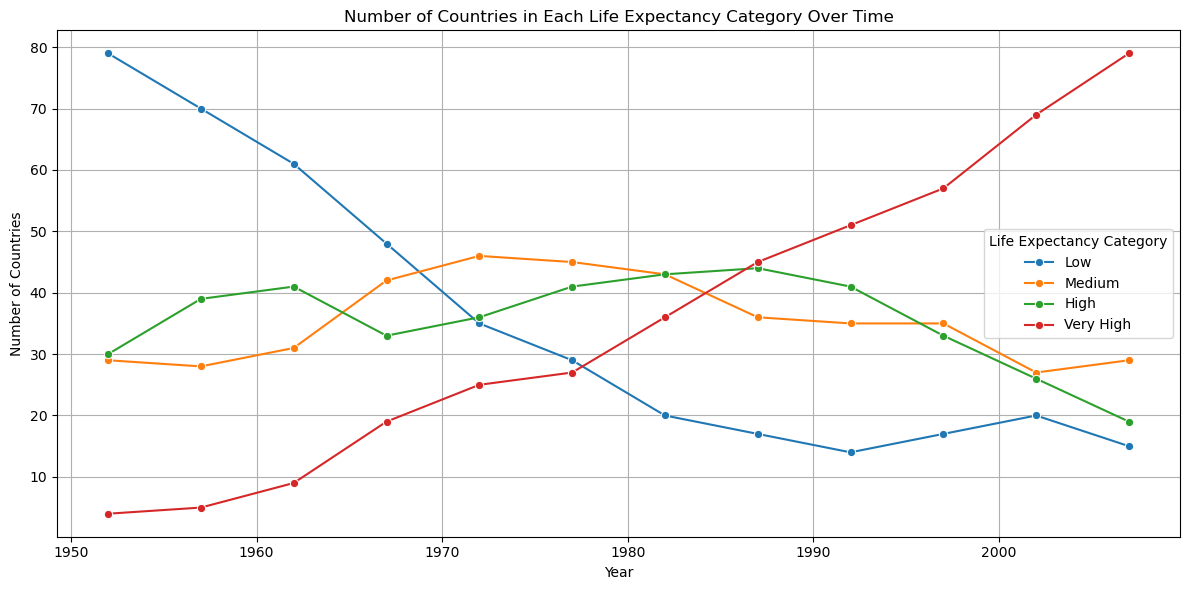

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(data=life_exp_bin_counts , x='year', y='number_of_countries', hue='life_exp_bin', marker='o')
plt.title('Number of Countries in Each Life Expectancy Category Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='Life Expectancy Category')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
gdp_cap_bin_counts = df.groupby(['year', 'gdp_cap_bin']).nunique().reset_index()
gdp_cap_bin_counts.rename(columns={'country': 'number_of_countries'}, inplace=True)

/tmp/ipykernel_26473/97987371.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_cap_bin_counts = df.groupby(['year', 'gdp_cap_bin']).nunique().reset_index()


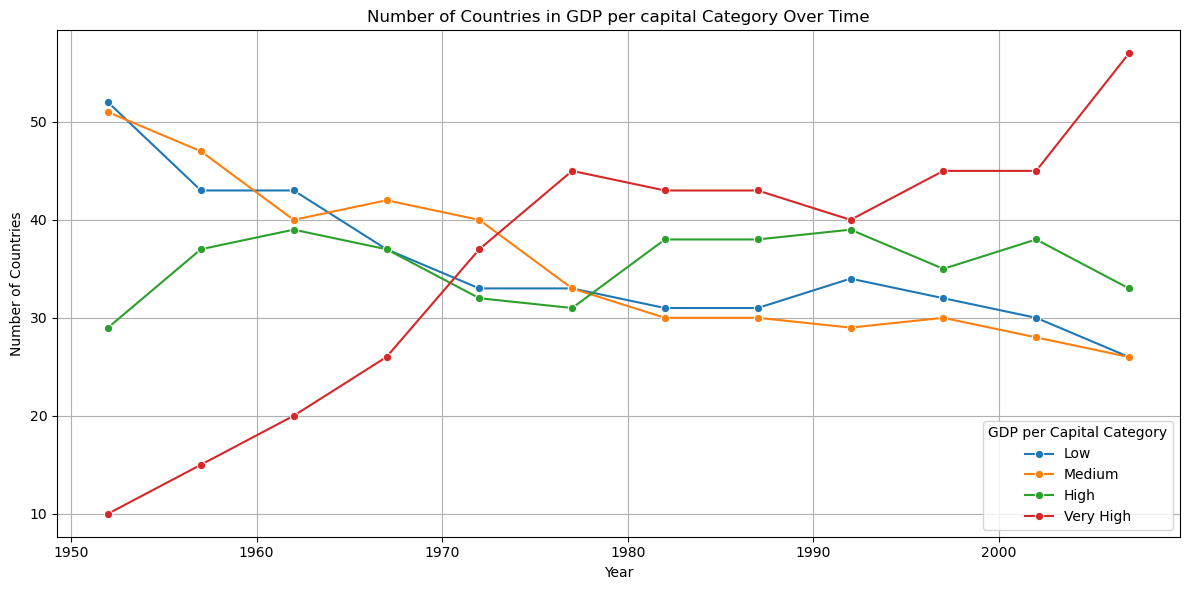

In [44]:
plt.figure(figsize=(12,6))
sns.lineplot(data=gdp_cap_bin_counts, x='year', y='number_of_countries', hue='gdp_cap_bin', marker='o')
plt.title('Number of Countries in GDP per capital Category Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='GDP per Capital Category')
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
df["decade"] = (df['year'].dt.year // 10) *10
decades = sorted(df['decade'].unique())

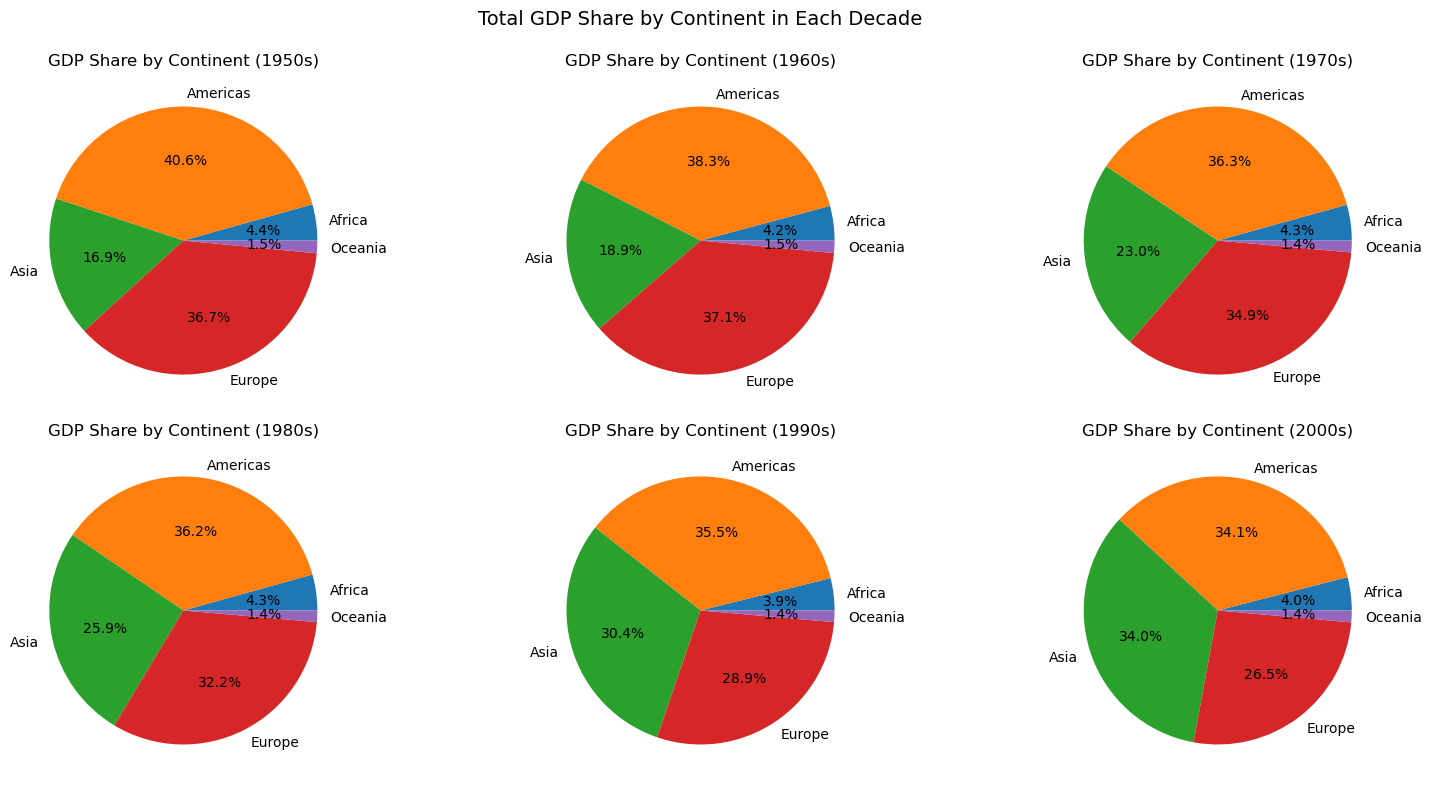

In [74]:
import math
import matplotlib.pyplot as plt

num_charts = len(decades)
n_rows = 2
n_cols = math.ceil(num_charts / n_rows)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 8))
axes = axes.flatten()

for i, decade in enumerate(decades):
    data = df[df['decade'] == decade].groupby('continent')['gdp_total'].sum()
    plt.sca(axes[i])  
    plt.pie(data, labels=data.index, autopct='%1.1f%%')  
    axes[i].set_title(f"GDP Share by Continent ({decade}s)")


plt.suptitle("Total GDP Share by Continent in Each Decade", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


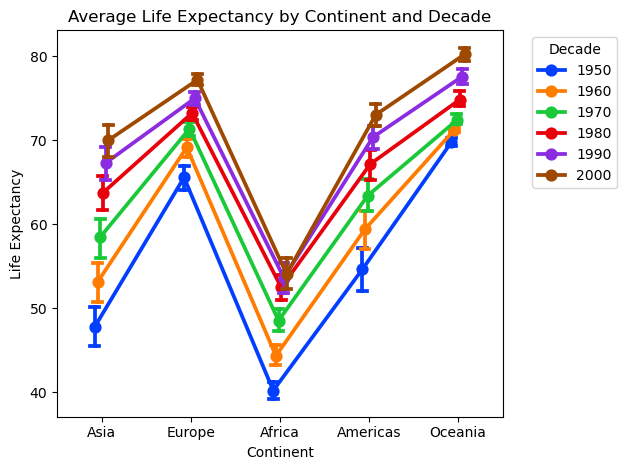

In [93]:
sns.pointplot(data=df, x='continent', y='life_exp', hue='decade', dodge=True, markers='o', capsize=0.1, palette='bright')
plt.title("Average Life Expectancy by Continent and Decade")
plt.ylabel("Life Expectancy")
plt.xlabel("Continent")
plt.legend(title='Decade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
